# Supervised Learning


<img src="../figures/supervised_wheel.png">


Supervised learning is dependent on labeled training data. The primary goal of supervised learning is to learn a mapping from input data to the desired target through a process of training. Target data, or labels, can take form as  continuous values (regression problems) or discrete numerical or categorical (classification) values. **Broadly, the goal is to iteravely inform the parameters of your model by optimizing a chosen cost function (loss function / objective function) over your target data**. There are many cost functions to choose from, especially once you get into customized neural networks. However, many tried-and-true methods perform well with Mean Squared Error (MSE) and binary cross entropy (log loss) for regression and classification, respectively.

<img src="../figures/supervised_concept.drawio.png">

## Terminology

An **estimator** refers to the type of model that is being used (e.g. logistic regression, linear regression, support vector machines).

The **loss function** (cost function) refers to the function you use to quantify how much your model's predictions differ from the target values they're trying to predict (e.g. log loss, mean squared error, cross entropy loss)

An **Activation function** is used to add non-linearity to a model. They are also used to transform the "weighted" input of a model into probabilities.

An **optimization technique** is a method for updating the parameters of your model to maximize its performance with respect to some loss function - often referred to as minimizing the loss such as stochastic gradient descent (SGD) or maximum likelihood estimation (MLE).

A **parameter** is a weight (or bias) *learned* by our model. It is not user-specified.

A **hyperparamter** is a user-specified attribute of a model or optimization scheme that impacts the learning in some way.

A **feature** or feature vector, in 2D space is often what we just consider a named variable. In higher dimesional spaces, features are often individual pixels or patches of an image, or individual time steps. 

**Feature Engineering** is any transformation we make to our data prior to model ingestion. Simple, but important, feature engineering is feature scaling. More domain specific feature engineering might include using different derived variables (such as RH or dewpoint) or using tendencies rather than instantaneous values. 

**Validation data** data is a subset of data witheld from training that is used for verification either during or after a model has been trained to determine if hyperparameters and the training scheme is adequate. 

**Overfitting** is when a model describes the traiing data well, but does not generalize to data outside the training set. This is a major issue in ML.

**Regularization** is a technique to reduce overfitting. These can be mathematical techniques such as "Lasso" and "Ridge" regularization, adding noise, or simpler methods such as careful data curation and partitioning strategies. 

## What does training data look like?

Traininig data can come in a variety of shapes and sizes, such as images or timeseries, and many custom architectures can handle different shapes of data. However, the **sklearn framework expects a strict 2D matrix** for the input data - the rows reresent an individual sample, and each column represents an indivual **feature**. Although neural networks (such as Convolutional Networks which are common use cases for image data) can handle 3D+ data as input, whereas sklearn models cannot, this does not necessarily mean you can't use n-dimentional data for input - you can flatten whichever dimensions you'd like to conform to the 2D format expected. In the image case, this would just mean flattening each 2D image into a 1D vector, thus making each pixel it's own feature. For example, flattening a set of 32 x 32 images for input into a model would result in a data shape of **(n_images, 1024)**. 

### Labels / Targets

Each input sample requires an associated target (label) which is used to evaluate its performance during training. These can be observations, modeled data, hand labeled, etc, really anything that we suspect has a useful relationship to our input. And of course, your model will inhereit the biases of the training data (both input and target data), so thoughtful consideration of what your training data looks like is important.

<img src="../figures/mode_labels.png">

#### Regression

Regression tasks map our input data to one or more continous numeric targets. So our target data in this case is generally straightforward and there is often minimal preprocessing necessary.

#### Classification 

Classification tasks map our input to one or more catergorical variables. This could be different earth system regimes, binary targets such as precipitation / no-precipitation, anomaly identification, locations, you name it. A couple of questions arise when thinking about modeling to a categorical variable:

* How do we treat nominal vs ordinal categorival variables?
* How do we convert our categories into something mathematically useful?

## Preprocessing

**Nominal vs Ordinal Variables**

**Nominal** variables have meaning within the order. Examples could be something such as Extreme Rain, Heavy Rain, Moderate Rain, and Light Rain. These can often be simply encoded into scaler integers,  zero (0) through (3). 

**Ordinal** variables on the other hand do not try and preserve order. Ordinal variables can be transformed with **one-hot encoding** which simply encodes each scaler into a binary 1D vector that sits in an orthogonal vector space (see diagram). A classic example of this is the MNIST hand written digits dataset where your targets are zero through nine (as hand written images). But as you can imagine, identifying a "1" vs a "2" should not be any more similar than a "1" vs a "9".

Labeling is often an arbitrary choice, and the line between an ordinal and nominal variable is not always completely clear. When it's not entirely clear if a target variable is ordinal or nominal, it often makes sense to treat it as nominal with the idea that we can learn the similarities amongst them. 

In the example below, the scaler numerical encoding above (middle column) would represent that a pulse storm is much more similar to a QLCS than a discrete supercell, or that the mean of a pulse storm and a bow echo is a QLCS. To remedy this, we can use **one-hot encoding**. This is not necessary with a binary classification problem, as using binary values themselves are appropriate for discriminating between the two.

<img src="../figures/one_hot.drawio.png">

In [1]:
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

convective_modes = ['Supercell', 'QLCS', 'Bow Echo', 'Pulse Storm']
modes = np.random.choice(convective_modes, 100)
modes

array(['Pulse Storm', 'Bow Echo', 'QLCS', 'Bow Echo', 'QLCS',
       'Pulse Storm', 'Supercell', 'Bow Echo', 'QLCS', 'Bow Echo',
       'Pulse Storm', 'Pulse Storm', 'QLCS', 'QLCS', 'Bow Echo',
       'Pulse Storm', 'QLCS', 'Bow Echo', 'Pulse Storm', 'Bow Echo',
       'Bow Echo', 'Bow Echo', 'Supercell', 'Supercell', 'Pulse Storm',
       'QLCS', 'QLCS', 'Supercell', 'Pulse Storm', 'Pulse Storm', 'QLCS',
       'Pulse Storm', 'Bow Echo', 'Supercell', 'Supercell', 'Supercell',
       'Supercell', 'Supercell', 'Bow Echo', 'Bow Echo', 'QLCS',
       'Supercell', 'Supercell', 'Bow Echo', 'Bow Echo', 'Supercell',
       'Bow Echo', 'Supercell', 'Supercell', 'Supercell', 'Bow Echo',
       'QLCS', 'Bow Echo', 'Supercell', 'Supercell', 'Bow Echo', 'QLCS',
       'Supercell', 'Supercell', 'QLCS', 'Supercell', 'Supercell',
       'Supercell', 'QLCS', 'Pulse Storm', 'Pulse Storm', 'QLCS',
       'Bow Echo', 'QLCS', 'QLCS', 'Pulse Storm', 'QLCS', 'Supercell',
       'QLCS', 'QLCS', 'QLCS', 'Supe

In [2]:
le = LabelEncoder()
le.fit_transform(modes)

array([1, 0, 2, 0, 2, 1, 3, 0, 2, 0, 1, 1, 2, 2, 0, 1, 2, 0, 1, 0, 0, 0,
       3, 3, 1, 2, 2, 3, 1, 1, 2, 1, 0, 3, 3, 3, 3, 3, 0, 0, 2, 3, 3, 0,
       0, 3, 0, 3, 3, 3, 0, 2, 0, 3, 3, 0, 2, 3, 3, 2, 3, 3, 3, 2, 1, 1,
       2, 0, 2, 2, 1, 2, 3, 2, 2, 2, 3, 1, 1, 2, 3, 0, 2, 3, 3, 0, 3, 0,
       1, 3, 1, 3, 1, 2, 3, 3, 2, 0, 3, 1])

In [3]:
rain_intensity = ['Extreme', 'Heavy', 'Moderate', 'Light']
intensities = np.random.choice(rain_intensity, 10)
intensities

array(['Extreme', 'Moderate', 'Moderate', 'Heavy', 'Moderate', 'Extreme',
       'Extreme', 'Heavy', 'Extreme', 'Moderate'], dtype='<U8')

In [4]:
ohe = OneHotEncoder(sparse_output=False)
ohe.fit_transform(np.array(intensities).reshape(-1, 1))

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])


Just as there is often much post processing necessary for evauation of any type of model, the same is certainly true for preprocessing for *input* into an ML model. Aside from the labeling procedures discussed above, we'll discuss two other important factors for preprocessing:
* Scaling and reshaping
* Data partitioning

### Scaling

When optimizing a function such as maximum likelihood, we want to have all of our features be on an "even playing field" such that one feature doesn't unecessarily dominate other features. In other words, we want the importance of each feature as a good predictor to be relative to it's own scale. If we have a feature that is orders of magitude (or even less) higher than other features, it will dominate the adjustment of weights and essentially wash out the other features. So an easy way to handle this is to scale each feature indipendently. There are a variety of method to do this (not an exhaustive list):
* Z Normalization
* Standardization
* Quantile Transforms

#### Z Nomralization

This is most common technique which transforms the data to have a specified mean and standard deviation - usually a mean of zero (0) and a standard deviation of one (1). Howeverm, this does not reshape the data so it is normally distributedm it only changes the relative ranges. The formula is $ z = {x_{i} - \mu \over \sigma} $ Sklearn has the `StandardScaler()` function to convieniently do this for us. [Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

####  MinMax Standadization

MinMax standardization involves rescaling your data between a specified range relative to the minimum and maximun values, which is often set to (-1, 1). The formula for MinMax Standardization is $ X = {x - x_{min} \over x_{max} - x_{min}} $ Sklearn has the `MinMaxScaler()` function to convieniently do this for us. [Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html).

#### Quantile transformations

Quantile transformations utilize a specified number of quantiles and maps those quantiles to either a uniform or normal distribution. Sklearn has the `QuantileTransformer()` function to convieniently do this for us. [Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.QuantileTransformer.html).

#### Advantages / Disadvantages of various scaling methods.

Sklearn has a [nice example](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#plot-all-scaling-quantile-transformer-section) of the effect of different scalers on some data with outliers.

**Z Normalization**
* Sensitive to outliers
 
**MinMax Standardization**
* Robust to outliers but may diminish impact of non outlier data in presence of outliers
 
**Quantile Transforms**
* Reduces impact of outliers, spreads out data with most frequent occurances
* highly useful for data that can span multiple orders of magnitude
 
Are all ML algorithms sensitive to the relatve scale of differnt features? No. In short, tree-based methods are not adversly affected by feature scale as well as other methods such as... Despite this, you can still get a change in perfommance as you're "engineering" the features, but this will always be data / problem dependent.

### Model fit (underfitting vs overfitting)

**The primary goal for most machine learning tasks is to generalize to unseen data.** It is often not hard to fit a model exceptionally well to our training data, but if it does not generalize well to unseen data for prediction tasks it won't do us much good. This is a model that is **overfit**.  Similarily, we can have a model that is **underfit**,  by generally being too simple to capture meaningful relationships, which would alkso perform poorly on unseen data. The goal is too strike a balance by not modeling the training data too closely, so that it can generalize as best as possible to unseen data.

<img src="../figures/overfit.png" width="600">

<img src="../figures/train_test_error.png" width="600">


There are a few ways we can tackle this issue, some depending on the type of algorithm we are using. One is through **regularization**. Broadly speaking, regularization imposes penalties to the loss function to prevent it from fitting noise too closely.

So how do we know if our model is overfit? We need other data sources seperate from our training dataset, known as **validation** and **testing** data.

#### Data Partitioning

<img src="../figures/data_partitioning.png">


#### Data transformation with held out data too!

Just as it is important to test a predictor on data held-out from training, preprocessing (such as standardization, feature selection, etc.) and similar data transformations similarly should be learnt from a training set and applied to held-out data for prediction.

<img src="../figures/data_splitting.png">


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, QuantileTransformer
from sklearn.datasets import make_circles, make_classification, make_moons, make_blobs
from sklearn.linear_model import LogisticRegression, SGDClassifier

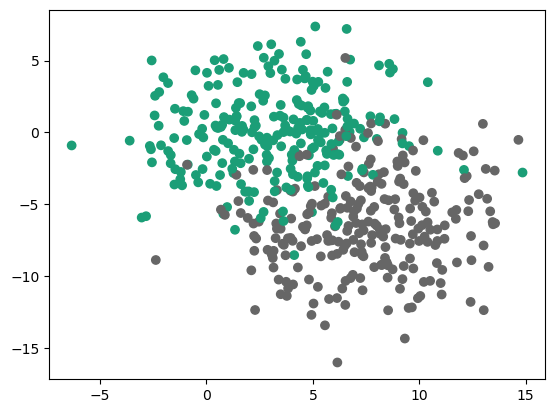

In [6]:
X, y = make_blobs(n_samples=500, n_features=2, centers=2, cluster_std=3, random_state=18)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='Dark2')

In [7]:
model = SGDClassifier(loss="log_loss", verbose=0, max_iter=10000, penalty='l2')
model.fit(X, y)

SGDClassifier(loss='log_loss', max_iter=10000)

In [8]:
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

def plot_dec_boundary(estimator, x, y):

    fig, ax = plt.subplots()
    title = ('Decision surface of linear SGD Classifier')
    
    # Set-up grid for plotting.
    X0, X1 = x[:, 0], x[:, 1]
    xx, yy = make_meshgrid(X0, X1)
    
    plot_contours(ax, estimator, xx, yy, cmap=plt.cm.Dark2, alpha=1)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.Dark2, s=20, edgecolors='k')
    ax.set_ylabel('Y')
    ax.set_xlabel('X')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
    plt.show()

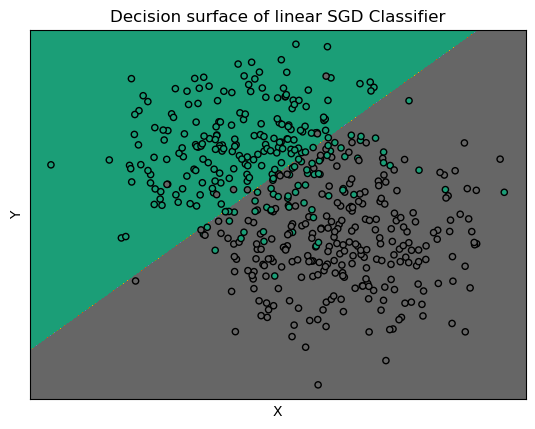

In [9]:
plot_dec_boundary(model, X, y)

In [10]:
# model.predict_proba(X)

We can inspect all the attributes of the model with the `vars()` keyword.

In [11]:
vars(model)

{'loss': 'log_loss',
 'penalty': 'l2',
 'learning_rate': 'optimal',
 'epsilon': 0.1,
 'alpha': 0.0001,
 'C': 1.0,
 'l1_ratio': 0.15,
 'fit_intercept': True,
 'shuffle': True,
 'random_state': None,
 'verbose': 0,
 'eta0': 0.0,
 'power_t': 0.5,
 'early_stopping': False,
 'validation_fraction': 0.1,
 'n_iter_no_change': 5,
 'warm_start': False,
 'average': False,
 'max_iter': 10000,
 'tol': 0.001,
 'class_weight': None,
 'n_jobs': None,
 'coef_': array([[ 5.05626522, -4.82203479]]),
 'intercept_': array([-28.89921418]),
 't_': 30501.0,
 'n_features_in_': 2,
 'classes_': array([0, 1]),
 '_expanded_class_weight': array([1., 1.]),
 'loss_function_': <sklearn.linear_model._sgd_fast.Log at 0x150282b70>,
 'n_iter_': 61}

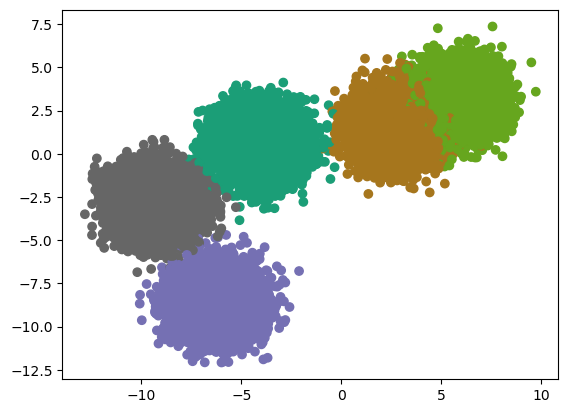

In [12]:
X, y = make_blobs(n_samples=50000, n_features=2, centers=5, random_state=17)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='Dark2')

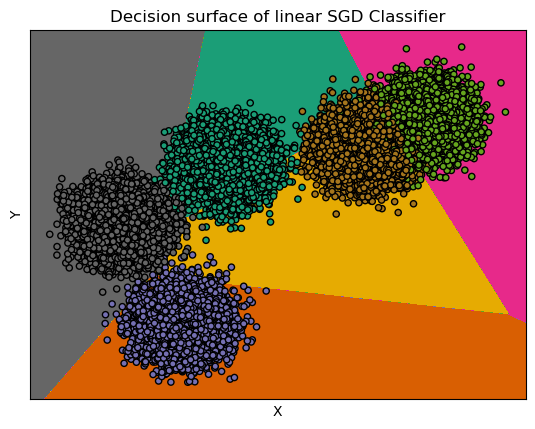

In [13]:
model = SGDClassifier(loss="log_loss", verbose=0, max_iter=10000, penalty='l2')
# model = LogisticRegression(verbose=0, max_iter=10000, penalty='l2')
model.fit(X, y)

plot_dec_boundary(model, X, y)

In [14]:
vars(model)

{'loss': 'log_loss',
 'penalty': 'l2',
 'learning_rate': 'optimal',
 'epsilon': 0.1,
 'alpha': 0.0001,
 'C': 1.0,
 'l1_ratio': 0.15,
 'fit_intercept': True,
 'shuffle': True,
 'random_state': None,
 'verbose': 0,
 'eta0': 0.0,
 'power_t': 0.5,
 'early_stopping': False,
 'validation_fraction': 0.1,
 'n_iter_no_change': 5,
 'warm_start': False,
 'average': False,
 'max_iter': 10000,
 'tol': 0.001,
 'class_weight': None,
 'n_jobs': None,
 'coef_': array([[ -0.64580904,   1.32067891],
        [ -3.47802978, -28.91013236],
        [ 18.0179027 ,   9.58822734],
        [  0.19951281,   0.09458284],
        [-58.1917229 ,  11.83821995]]),
 'intercept_': array([  -3.25443842, -200.28709514, -100.15523006,   -1.29442138,
        -388.25954337]),
 't_': 1700001.0,
 'n_features_in_': 2,
 'classes_': array([0, 1, 2, 3, 4]),
 '_expanded_class_weight': array([1., 1., 1., 1., 1.]),
 'loss_function_': <sklearn.linear_model._sgd_fast.Log at 0x150282dd0>,
 'n_iter_': 34}

Here we can see a variety of decision boudaries for for a variety of sklearn estimators. [Code here](https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py).

<img src="../figures/decision_boundaries.png">

# SARS Supercell data 

Okay, let's go back to our SARS data, but this time we'll use an anolog for tornadic supercells instead of hail. Our labels for our classification problem will be `CAT` (0 = Non-tornadic, 1 = weak-tornadic, 2 = tornadic). [Sounding Analog Retrieval System (SARS) dataset](https://www.spc.noaa.gov/publications/jewell/sars.pdf). 

In [15]:
supercell = pd.read_parquet('../0_data/SARS_supercell.parquet')
supercell

,CAT,MLMIXR,ML CAPE,ML CIN,MLCL(MAGL),0-1SRH,0-6KT,STPC,500 T (C),500DIR,7-5 LR,0-3(KT),0-9(KT),0-3 KM SRH (M2/S2)
201,2.0,15.6,2612.0,-4.0,971.0,250.0,52.799999,5.7,-11.700000,260.0,8.6,45.500000,72.500000,337.0
706,0.0,14.0,3853.0,-58.0,1033.0,227.0,43.599998,5.8,-13.500000,250.0,7.4,27.500000,43.500000,247.0
444,1.0,15.2,2700.0,-10.0,801.0,171.0,47.000000,3.6,-10.900000,219.0,7.5,25.299999,68.400002,216.0
523,0.0,9.9,1306.0,-11.0,1121.0,172.0,50.599998,1.7,-17.299999,203.0,6.6,39.599998,44.099998,206.0
870,0.0,14.6,1425.0,-21.0,712.0,95.0,53.200001,1.2,-9.500000,238.0,5.9,38.099998,53.700001,106.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,1.0,12.8,1776.0,-6.0,916.0,106.0,37.000000,1.2,-13.000000,217.0,6.9,22.000000,45.000000,157.0
123,2.0,11.7,1189.0,-11.0,1302.0,251.0,72.400002,2.1,-13.600000,230.0,7.3,55.700001,66.800003,370.0
400,1.0,10.3,1602.0,-8.0,1272.0,103.0,41.599998,0.8,-12.300000,237.0,6.8,29.900000,68.199997,173.0
752,0.0,9.5,1004.0,-128.0,1142.0,153.0,30.200001,0.3,-13.400000,233.0,8.2,31.200001,63.299999,235.0


Okay, let's start by partitoining a training and validation set. There are some built-in methods to do this in sklearn, but can often be done just as easily in a custom fashion.

In [16]:
train = supercell.sample(frac=0.75)
val = supercell.drop(train.index)

train_x = train.drop(['CAT'], axis=1)
train_y = train['CAT'].astype(int)
val_x = val.drop(['CAT'], axis=1)
val_y = val['CAT'].astype(int)

scaler = StandardScaler()
scaled_train_x = scaler.fit_transform(train_x)
scaled_val_x = scaler.transform(val_x) # only transform on the val set!

Since we can only plot our decision surface with two variables, let's see if we can do some dimentionality reduction and model that.

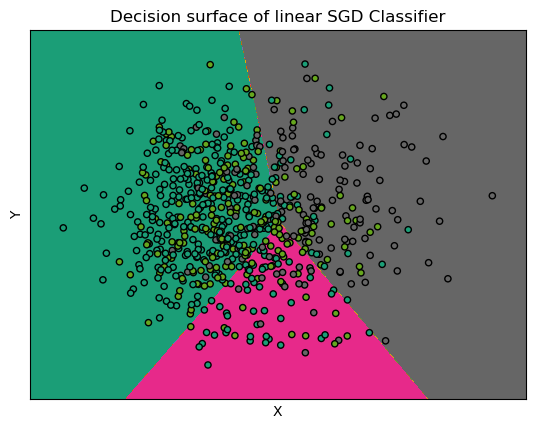

In [30]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
pca = PCA(n_components=2)
pca_x = pca.fit_transform(scaled_train_x)
pca_x_val = pca.transform(scaled_val_x)

model = SGDClassifier(loss="log_loss", verbose=0, max_iter=10000, penalty='l2')
model.fit(pca_x, train_y)

plot_dec_boundary(model, pca_x, train_y)

In [31]:
pca.explained_variance_ratio_

array([0.29406947, 0.20135331], dtype=float32)

In [32]:
preds = model.predict(pca_x_val)
preds

array([0, 0, 2, 0, 0, 0, 2, 2, 0, 1, 2, 0, 2, 0, 0, 0, 2, 1, 2, 1, 0, 0,
       0, 1, 2, 0, 1, 0, 0, 2, 2, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 1, 2,
       0, 0, 0, 0, 1, 1, 0, 2, 0, 0, 1, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 2, 0, 0, 2, 1, 2, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 2, 1, 1, 0, 0, 0, 1, 0, 0, 2, 2, 2, 0, 1, 0, 0, 2, 2, 0,
       0, 0, 0, 2, 2, 0, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 0, 0, 1, 0, 2,
       2, 0, 0, 1, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 2,
       1, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 2, 2, 0, 2, 0, 0, 1, 0, 1, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 2, 0, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0,
       0, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 2])

In [33]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
accuracy_score(val_y, preds)

0.47863247863247865

In [34]:
supercell.groupby('CAT').median()

,MLMIXR,ML CAPE,ML CIN,MLCL(MAGL),0-1SRH,0-6KT,STPC,500 T (C),500DIR,7-5 LR,0-3(KT),0-9(KT),0-3 KM SRH (M2/S2)
CAT,,,,,,,,,,,,,
0.0,12.0,1469.0,-36.0,1250.0,81.0,43.400002,0.3,-11.3,261.0,7.4,29.0,58.099998,167.0
1.0,12.5,1625.0,-29.0,1047.0,116.0,44.799999,0.8,-11.7,245.0,7.3,30.9,55.299999,205.0
2.0,13.9,2395.0,-16.0,974.0,209.0,51.400002,3.1,-11.7,240.0,7.5,37.5,63.900002,278.0


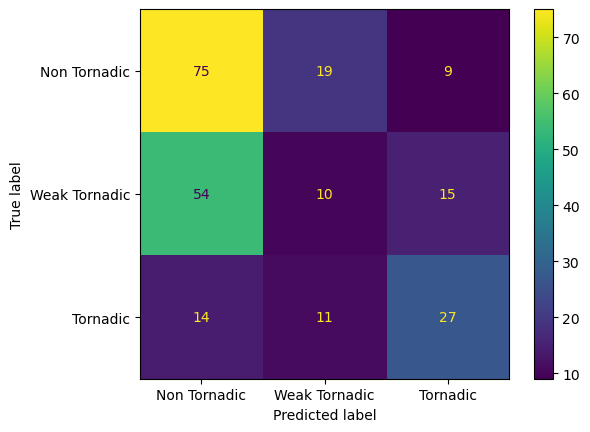

In [35]:
labels = ['Non Tornadic', 'Weak Tornadic', 'Tornadic']
cm = confusion_matrix(val_y, preds)
ConfusionMatrixDisplay(cm, display_labels=labels).plot()

### Validation techniques:

#### K-fold Cross-validation

K-Fold cross-validation is a nice, although expensive, appraoch to verification that the model is not overfitting to the data. Assuming your data is representative, a low variance across different folds should indicate that your model can generalize well.

<img src="../figures/k-fold-diagram.png">

## Coding Excercises

1. Coding excercise: Change the problem to a binary classification problem (tornadic vs "other") and train a new model. Also, can you identify a variable that probably doesn't belong? If so, remove prior to training. 

2. Coding Excercise: Switch to the "Hail" dataset (data below). Train a regression model to predict hail size. Use a cross-validation strategy with 10 splits with an 80/20 train/validation split. What is the mean and std of the validation?

3. Train a classifier model to predict the precipitation type (data below) using any combination of features.

* Split the data into a train / validation set
* Scale the data appropriately
* One hot encode the targets
* Can you think of some interesting ways to visualize the input and/or predictions?

In [23]:
hail = pd.read_parquet('../0_data/SARS_supercell.parquet')

In [26]:
ptype_data = pd.read_parquet("../0_data/ptype_data_workshop.parquet")